# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head() 



,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

- Understand the distribution of the data
- Look for initial relations
- Checkt the assumptions of multiple linear regression

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

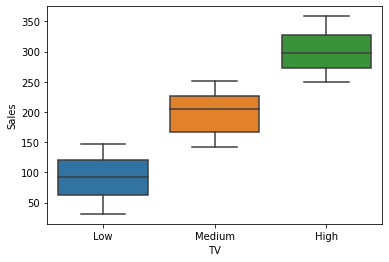

In [4]:
# Create a boxplot with TV and Sales.

sns.boxplot(x="TV", y="Sales", data=data)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

Yes there is a variation between sales and TV this can be seen because the box plots have different central values.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

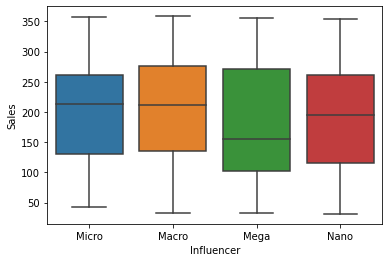

In [5]:
# Create a boxplot with Influencer and Sales.

sns.boxplot(x="Influencer", y="Sales", data=data)
 
plt.show()


**Question:** Is there variation in `Sales` based off the `Influencer` size?

There might be but it cannot be determined for sure just by this plot. Further investigation is needed.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [6]:
# Drop rows that contain missing data and update the DataFrame.

print(data.shape)

data = data.dropna(axis=0)


# Confirm the data contains no missing values.

data.shape



(572, 5)


(569, 5)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [7]:
# Define the OLS formula.

formula = "Sales ~ C(Influencer)"

# Create an OLS model.

OLS = ols(formula, data)


# Fit the model.

model = OLS.fit()


# Save the results summary.

summary = model.summary()


# Display the model results.

summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.206
Date:                Sat, 31 Aug 2024   Prob (F-statistic):             0.0863
Time:                        12:20:20   Log-Likelihood:                -3366.0
No. Observations:                 569   AIC:                             6740.
Df Residuals:                     565   BIC:                             6757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                206.6418      7.897     26.166      0.000     191.130     222.153
C(Influencer)[T.Mega]    -26.2567     10.841     -2.422      0.016     -47.550      -4.964
C(Influencer)[T.Micro]    -7.9867     10.876     -0.734      0.463     -29.348      13.375
C(Influencer)[T.Nano]    -16.8990     10.841     -1.559      0.120     -38.192       4.394
==============================================================================
Omnibus:                      191.779   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.590
Skew:                           0.038   Prob(JB):                     6.19e-07
Kurtosis:                       1.905   Cond. No.                         4.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

I chose Influencer because it appears to be more tricky it is not clear where the difference are statistically significant while for the TV the visualization emphasized differences more.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

The model does not have continuous variables. So this assumption is met regardless.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

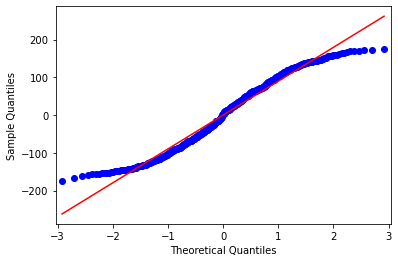

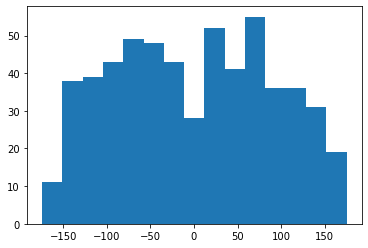

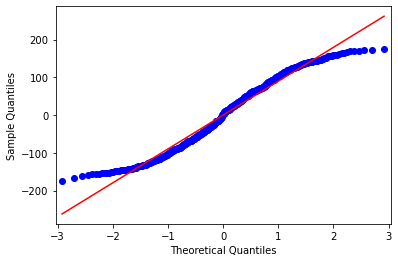

In [13]:
# Calculate the residuals.

residuals = model.resid


# Create a histogram with the residuals. 

plt.hist(residuals, bins=15)

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line="s") 



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

The normality is still not 100% clear. Since the histogram seems rather bimodal and the qq plot has some divergence on both extremes.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

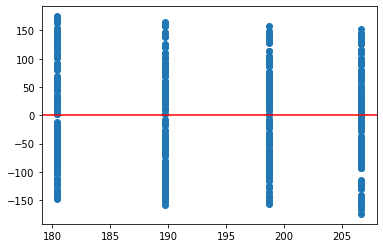

In [16]:
# Create a scatter plot with the fitted values from the model and the residuals.

plt.scatter(model.fittedvalues, residuals)


# Add a line at y = 0 to visualize the variance of residuals above and below 0.

plt.axhline(y=0, color="r")



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

No this variable is not homoscedastic. It is grouped which is no issue, however there is a clear vertical pattern of the data points.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [18]:
# Display the model results summary.

summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.206
Date:                Sat, 31 Aug 2024   Prob (F-statistic):             0.0863
Time:                        12:20:20   Log-Likelihood:                -3366.0
No. Observations:                 569   AIC:                             6740.
Df Residuals:                     565   BIC:                             6757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                206.6418      7.897     26.166      0.000     191.130     222.153
C(Influencer)[T.Mega]    -26.2567     10.841     -2.422      0.016     -47.550      -4.964
C(Influencer)[T.Micro]    -7.9867     10.876     -0.734      0.463     -29.348      13.375
C(Influencer)[T.Nano]    -16.8990     10.841     -1.559      0.120     -38.192       4.394
==============================================================================
Omnibus:                      191.779   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.590
Skew:                           0.038   Prob(JB):                     6.19e-07
Kurtosis:                       1.905   Cond. No.                         4.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

The models R-Squared is very low: 0.012 which indicates that the variable Influencer does not account for more than 1.2 percent of the sales variable.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

Here the only significant coefficient is the Mega influencer with 0.016 however the rest is statistically unsignificant.

**Question:** Do you think your model could be improved? Why or why not? How?

I believe the model was trained properly and it is just the variable that doesn't account for a lot of difference in the sales values.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [19]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Influencer),5.366343e+04,3.0,2.206305,0.086322
Residual,4.580788e+06,565.0,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

- H0: There is no difference in Sales given the Influencer Value
- H1: There is a difference in Sales given the Influencer Value

**Question:** What is your conclusion from the one-way ANOVA test?

The one way anova makes me fail to reject the null hypothesis and therefore I can statistically claim that the Influencer value does not create significant differences in the Sales value.

**Question:** What did the ANOVA test tell you?

Already answered.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [21]:
# Perform the Tukey's HSD post hoc test.


tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["Influencer"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Macro,Mega,-26.2567,0.0742,-54.1903,1.6769,False
Macro,Micro,-7.9867,0.8731,-36.0106,20.0371,False
Macro,Nano,-16.899,0.4045,-44.8326,11.0346,False
Mega,Micro,18.27,0.3074,-8.886,45.426,False
Mega,Nano,9.3577,0.7852,-17.7051,36.4206,False
Micro,Nano,-8.9122,0.8106,-36.0682,18.2437,False


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

It explains whether with a confidence interval I can reject a hypothesist or not.

**Question:** What did the post hoc tell you?**

I cannot reject any null hypothesis.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

- 
**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

The variables Influencer and therefore marketing on it is not an effective way to generate sales.


#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.